## PCA Tutorial
Performing PCA (Principal Component Analysis) on a dataset is a common technique to reduce the dimensionality of the dataset while preserving its essential information. In this tutorial, we will use Python and the scikit-learn library to perform PCA on the MNIST dataset.

### Prerequisites

Before getting started, ensure that you have the following libraries installed:

- NumPy: for numerical operations
- scikit-learn: for PCA implementation and dataset
- Matplotlib: for data visualization

You can install these libraries using pip:

```bash
pip install numpy scikit-learn matplotlib
```

### Step 1: Import Libraries and Load the MNIST Dataset

We'll use the scikit-learn library to load a subset of the MNIST dataset, which consists of handwritten digits. For this example, we will use a smaller subset of the data to speed up processing.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import tensorflow as tf


In [2]:
# Load the MNIST dataset from TensorFlow/Keras
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()


# Reshape the data to a 2D array for PCA
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Display the shape of the dataset
print("Training dataset shape:", X_train.shape)
print("Testing dataset shape:", X_test.shape)


Training dataset shape: (60000, 784)
Testing dataset shape: (10000, 784)


### Step 2: Standardize the Data
PCA is sensitive to the scale of the data, so it's essential to standardize the data before applying PCA.

In [3]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


### Step 3: Perform PCA

Now, let's perform PCA on the standardized data. You can choose the number of components based on how much variance you want to retain.


In [11]:
# Create a PCA instance with the desired number of components
n_components = 320  # You can adjust this number
pca = PCA(n_components=n_components)

# Fit PCA to the standardized training data
X_train_pca = pca.fit_transform(X_train_std)

# Transform the testing data using the same PCA
X_test_pca = pca.transform(X_test_std)

# Display shape after pca
print("Dimensions after PCA: ", X_train_pca.shape[1])

# Display shape after pca
print("Original Dimensions: ", X_train.shape[1])

# Display the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_.sum()
print(f"Explained variance ratio with {n_components} components: {explained_variance_ratio:.2f}")


Dimensions after PCA:  320
Original Dimensions:  784
Explained variance ratio with 320 components: 0.95


### Step 4: Visualize the Effect of PCA

To visualize the effect of PCA, you can plot some of the original images and their reconstructed versions using the PCA components.

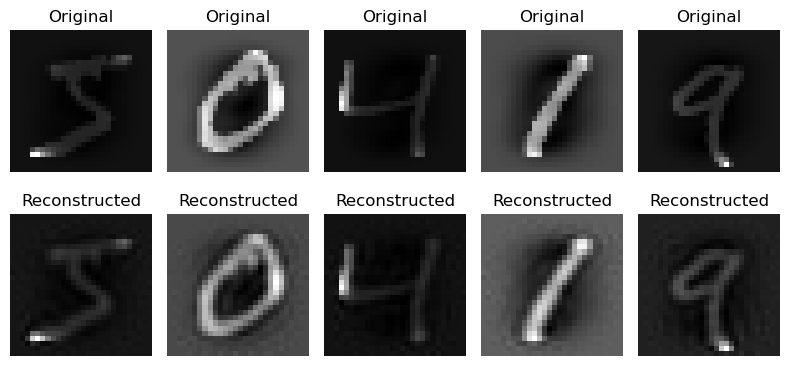

In [12]:
# Function to plot the original and reconstructed images
def plot_images(original, reconstructed):
    plt.figure(figsize=(8, 4))
    for i in range(5):
        plt.subplot(2, 5, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis('off')
        plt.subplot(2, 5, i + 6)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.title("Reconstructed")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Inverse transform PCA to get the reconstructed data
X_train_reconstructed = pca.inverse_transform(X_train_pca)

# Plot some original and reconstructed images
plot_images(X_train_std, X_train_reconstructed)


In this code, we define a function `plot_images` to visualize the original and reconstructed images. We then use PCA to reduce the dimensionality of the data and inverse transform it to get the reconstructed images.

### Conclusion

You've now performed PCA on the MNIST dataset, reducing its dimensionality while preserving its essential information. PCA can be a useful technique for dimensionality reduction and visualization of high-dimensional data. You can experiment with the number of components to see how it affects the reconstructed images and the explained variance ratio.